##importing the dataset IMDB and required packages

In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

num_words = 10000  
maxlen = 500


##splitting the data into training and testing

In [26]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (25000, 500)
Test data shape: (25000, 500)


##building the base neural network with two hidden layers

In [27]:
def build_baseline_model():
    model = models.Sequential()
    model.add(layers.Embedding(num_words, 16, input_length=maxlen))  # Embedding layer
    model.add(layers.Flatten())  # Flatten to 1D
    model.add(layers.Dense(16, activation='relu'))  # First hidden layer
    model.add(layers.Dense(16, activation='relu'))  # Second hidden layer
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
baseline_model = build_baseline_model()
baseline_history = baseline_model.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.5020 - loss: 0.6934 - val_accuracy: 0.5080 - val_loss: 0.6929
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.5458 - loss: 0.6908 - val_accuracy: 0.5574 - val_loss: 0.6786
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6388 - loss: 0.6607 - val_accuracy: 0.7340 - val_loss: 0.6034
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.7313 - loss: 0.5763 - val_accuracy: 0.7008 - val_loss: 0.5683
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.7860 - loss: 0.4837 - val_accuracy: 0.7288 - val_loss: 0.5225


##modifying the model with "tanh" activation function

#i)model with dropout function

In [28]:
def build_model_with_dropout():
    model = models.Sequential()
    model.add(layers.Embedding(num_words, 16, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
dropout_model = build_model_with_dropout()
dropout_history = dropout_model.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.5071 - loss: 0.6938 - val_accuracy: 0.5174 - val_loss: 0.6930
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.5148 - loss: 0.6923 - val_accuracy: 0.5258 - val_loss: 0.6921
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5503 - loss: 0.6867 - val_accuracy: 0.6588 - val_loss: 0.6641
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.6571 - loss: 0.6417 - val_accuracy: 0.7174 - val_loss: 0.5635
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.7396 - loss: 0.5535 - val_accuracy: 0.8212 - val_loss: 0.4957


#ii) model with "tanh" activation function

In [18]:
def build_model_with_tanh():
    model = models.Sequential()
    model.add(layers.Embedding(num_words, 16, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='tanh'))  # Tanh activation
    model.add(layers.Dense(16, activation='tanh'))  # Tanh activation
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
tanh_model = build_model_with_tanh()
tanh_history = tanh_model.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.5241 - loss: 0.6982 - val_accuracy: 0.5534 - val_loss: 0.6649
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7038 - loss: 0.5950 - val_accuracy: 0.7628 - val_loss: 0.5053
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8046 - loss: 0.4419 - val_accuracy: 0.8166 - val_loss: 0.4103
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.8395 - loss: 0.3722 - val_accuracy: 0.8318 - val_loss: 0.3689
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.8706 - loss: 0.3058 - val_accuracy: 0.8182 - val_loss: 0.4063


##Visualizing the model performance
Training Vs Validation Accuracy

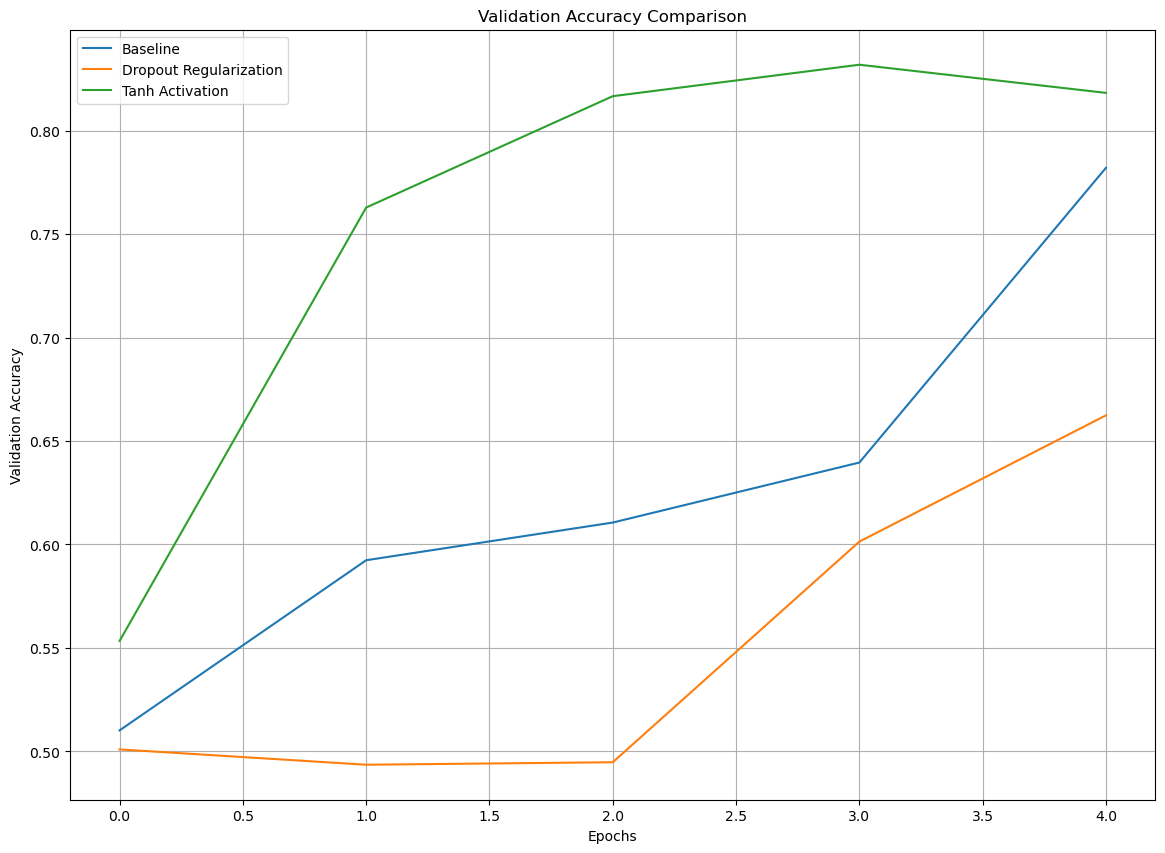

In [19]:
def plot_accuracy(histories, titles):
    plt.figure(figsize=(14, 10))
    for i, history in enumerate(histories):
        plt.plot(history.history['val_accuracy'], label=titles[i])
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_accuracy([baseline_history, dropout_history, tanh_history], 
              ['Baseline', 'Dropout Regularization', 'Tanh Activation'])

##Training Vs Validation Loss

In [30]:
def plot_loss(histories, titles):
    plt.figure(figsize=(14, 10))
    for i, history in enumerate(histories):
        plt.plot(history.history['val_loss'], label=titles[i])
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    plot_loss([baseline_history, dropout_history, tanh_history], 
          ['Baseline', 'Dropout Regularization', 'Tanh Activation'])


##Evaluating the Test dataset

In [21]:
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(test_data, test_labels)
dropout_test_loss, dropout_test_acc = dropout_model.evaluate(test_data, test_labels)
tanh_test_loss, tanh_test_acc = tanh_model.evaluate(test_data, test_labels)

print(f'Baseline Model Test Accuracy: {baseline_test_acc:.4f}')
print(f'Dropout Model Test Accuracy: {dropout_test_acc:.4f}')
print(f'Tanh Model Test Accuracy: {tanh_test_acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7820 - loss: 0.4776
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6527 - loss: 0.6630
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8163 - loss: 0.4060
Baseline Model Test Accuracy: 0.7805
Dropout Model Test Accuracy: 0.6474
Tanh Model Test Accuracy: 0.8204


###The tanh activation model is the best-performing model with a test accuracy of 0.8204, indicating that it generalizes better to unseen data. While dropout is a useful technique in many cases, it did not help in this instance and led to underfitting. The baseline model performed reasonably well but was outperformed by the tanh activation model.

Therefore, in this scenario, using the tanh activation function is the most effective modification for improving performance on the IMDb sentiment analysis task.






